In [1]:
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import detect_slip_lines as dl
import cv2


In [2]:
path_to_image ='/rwthfs/rz/cluster/work/hd242061/images_collective'
path_to_best_model = './sub_010.0012/model_1.h5'

In [3]:
new_model = tf.keras.models.load_model(path_to_best_model)

2023-01-27 14:42:58.257082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sys.hpc.itc.rwth-aachen.de/jupyter/clients/materials-chemistry/lib/python3.9/site-packages/cv2/../../lib64:/rwthfs/rz/SW/MATLAB/matlab_2022b_toolbox_NAG/mex.a64:/usr/local_rwth/sw/gcc/11.2.0/lib64:/usr/local_rwth/sw/gcc/11.2.0/lib:/rwthfs/rz/SW/cuda/cudnn/8.3.2/11.5/lib:/rwthfs/rz/SW/cuda/cudnn/8.3.2/11.5/lib64:/usr/local_rwth/sw/cuda/11.5.2/extras/CUPTI/lib64:/usr/local_rwth/sw/cuda/11.5.2/nvvm/lib64:/usr/local_rwth/sw/cuda/11.5.2/computeprof/bin:/usr/local_rwth/sw/cuda/11.5.2/lib64:/usr/local_rwth/sw/cuda/11.5.2/lib64/lib64:/opt/intel/impi/2018.4.274/compilers_and_libraries/linux/mpi/lib64:/opt/intel/impi/2018.4.274/compilers_and_libraries/linux/mpi/lib:/opt/intel/Compiler/19.0/1.144/rwthlnk/daal/lib/intel64_lin:/opt/intel/Compiler/19.0/1.144/

In [4]:
image_names = glob.glob(path_to_image + "/*.png")

In [5]:
num = np.random.randint(1,len(image_names))
image = dl.preprocess(image_names[num])
image.shape

(1, 768, 1024, 1)

In [6]:
y_pred=new_model.predict(image)
pred = (y_pred > 0.5).astype(np.uint8)

1/1 [==============================] - 1s 1s/step


In [7]:
pred.shape

(1, 768, 1024, 1)

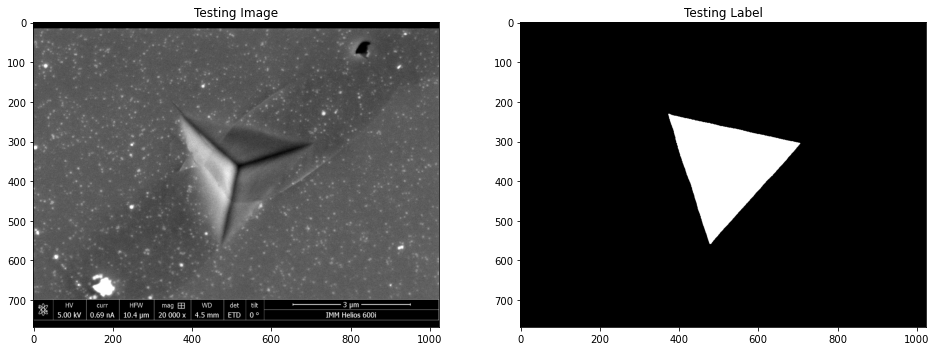

In [8]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Testing Image')
plt.imshow(image[0,:, :, 0], cmap='gray')
plt.subplot(122)
plt.title('Testing Label')
plt.imshow(pred[0, :, :, 0], cmap='gray')

plt.show()

In [15]:
# convert shapes of image and predicted mask to H * W
prediction = np.reshape(pred, (768, 1024))
input_image = np.reshape(image, (768, 1024))



In [16]:
# find corners of the detected triangle
corners = dl.find_corners(prediction)


In [17]:
# find corners of quadratic regions of interest on the edges of the triangle
p1, p2, p3 = dl.edge_quad_points(corners, H=100)
# mask the image with regions of interest
maskimage = dl.region_of_interest(p1, p2, p3, input_image)

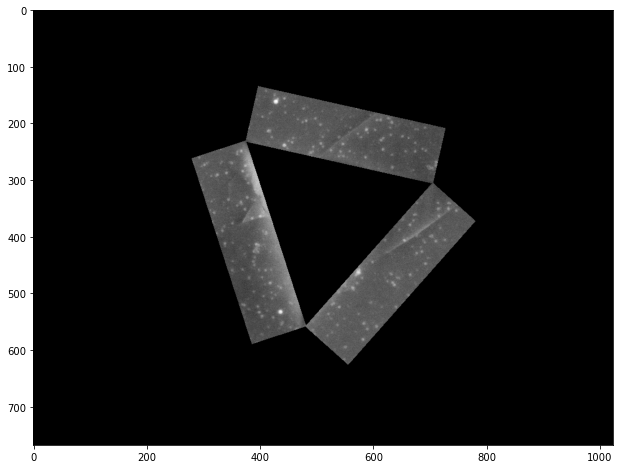

In [18]:
plt.figure(figsize=(16, 8))
plt.imshow(maskimage, cmap='gray')

In [25]:
# find slopes of lines in regions of interst, draw them on the image
img, slopes = dl.detect_lines(
        maskimage,
        p1,p2,p3,
        gauss_k=7,
        low_th=1,
        high_th=70,
        min_vote=50,
        min_line_length=60,
        max_line_gap=15,
        atol_p=40,
        atol_m=5
    )


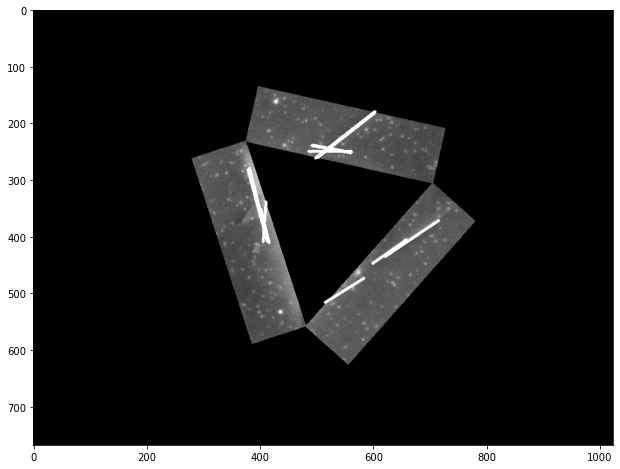

In [26]:
plt.figure(figsize=(16, 8))
plt.imshow(img, cmap='gray')

In [27]:
slopes

[[-0.6736842105263158],
 [3.735294117647059],
 [-0.7835051546391752],
 [4.0],
 [-0.7821782178217822],
 [-14.2],
 [-0.7],
 [-0.780952380952381],
 [0.19117647058823528],
 [0.17647058823529413],
 [0.0],
 [4.0],
 [0.18571428571428572],
 [-0.6231884057971014]]